In [142]:
#Importing Data and Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'C:\Users\ms904\Desktop\Movies-Data.csv')

In [143]:
#Initial Data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [65]:
# Identifying Missing Data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())*100
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [66]:
#Removing incomplete rows
df = df.dropna()

In [ ]:
#Formatting rows
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [ ]:
#Correcting year 
df['CorrectedYear'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [105]:
#Ordering data
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [ ]:
#Checking for duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

In [113]:
#Correlation data
df.corr()

,year,score,votes,budget,gross,runtime,CorrectedYear
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
CorrectedYear,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

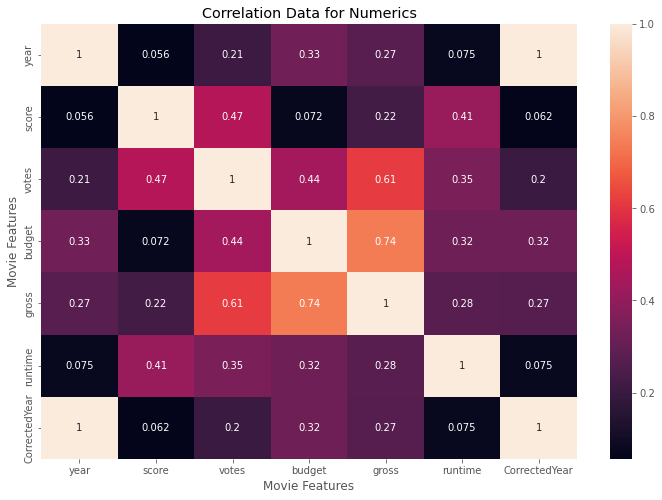

In [117]:
correlation_data = df.corr()
sns.heatmap(correlation_data, annot=True)
plt.title('Correlation Data for Numerics')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

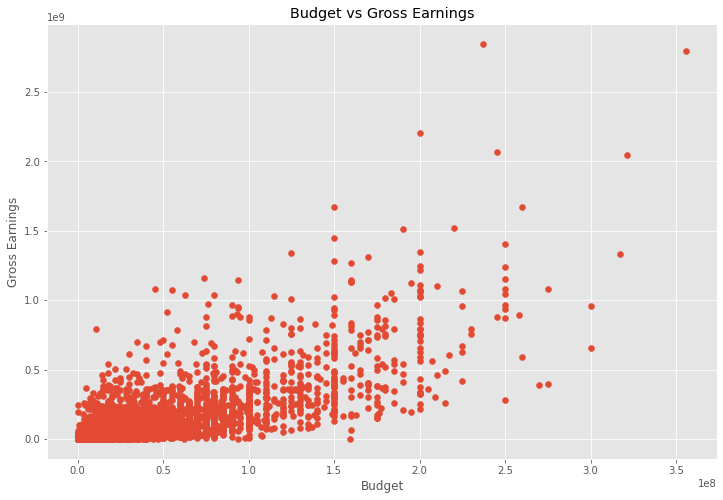

In [107]:
# Correlation of budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

[Text(0.5, 1.0, 'Budget vs Gross Earnings')]

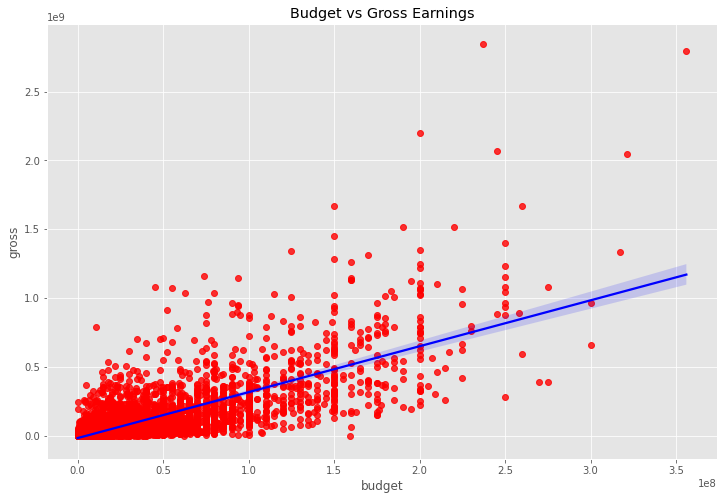

In [114]:
#Trend Line of Budget vs Gross
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color': 'blue'}).set(title="Budget vs Gross Earnings")

In [121]:
#Converting company name to a numeric value
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

<function matplotlib.pyplot.show(close=None, block=None)>

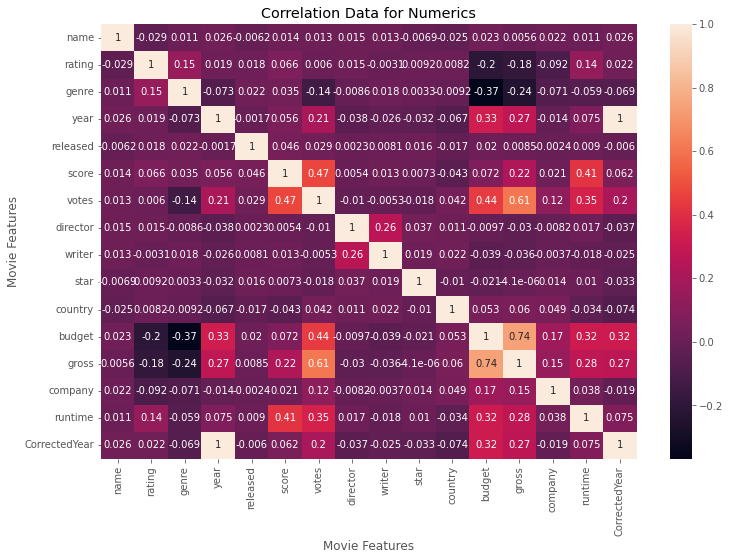

In [124]:
#Correlation of company vs gross
correlation_data = df_numerized.corr()
sns.heatmap(correlation_data, annot=True)
plt.title('Correlation Data for Numerics')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [131]:
#Simplified view
correlation_data2 = df_numerized.corr()
correlation_pairs = correlation_data2.unstack()
sorted_pairs = correlation_pairs.sort_values() #can use either pair
pd.set_option('display.max_rows', None)
correlation_pairs

name           name             1.000000
               rating          -0.029234
               genre            0.010996
               year             0.025542
               released        -0.006152
               score            0.014450
               votes            0.012615
               director         0.015246
               writer           0.012880
               star            -0.006882
               country         -0.025490
               budget           0.023392
               gross            0.005639
               company          0.021697
               runtime          0.010850
               CorrectedYear    0.025542
rating         name            -0.029234
               rating           1.000000
               genre            0.147796
               year             0.019499
               released         0.018083
               score            0.065983
               votes            0.006031
               director         0.014656
               w

In [141]:
#Showing higher correlations
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]
high_correlation

gross          votes            0.614751
votes          gross            0.614751
budget         gross            0.740247
gross          budget           0.740247
CorrectedYear  year             0.998726
year           CorrectedYear    0.998726
rating         rating           1.000000
CorrectedYear  CorrectedYear    1.000000
genre          genre            1.000000
company        company          1.000000
score          score            1.000000
votes          votes            1.000000
writer         writer           1.000000
gross          gross            1.000000
year           year             1.000000
released       released         1.000000
director       director         1.000000
star           star             1.000000
name           name             1.000000
budget         budget           1.000000
runtime        runtime          1.000000
country        country          1.000000
dtype: float64

[Text(0.5, 1.0, 'Budget vs Gross Earnings')]

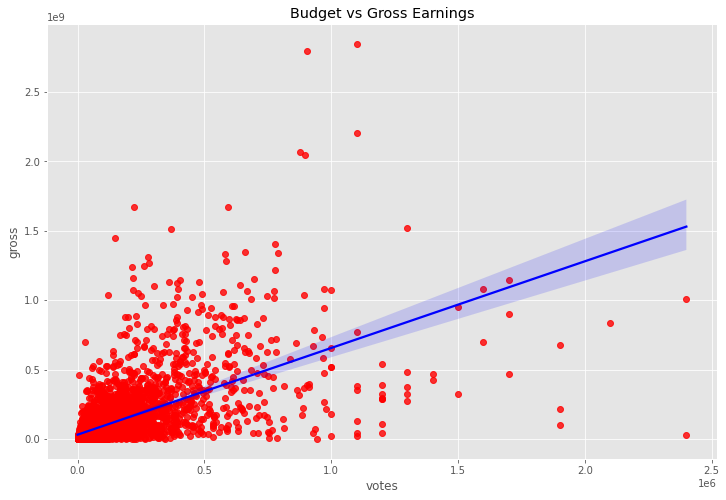

In [125]:
#Correlation of votes and gross
sns.regplot(x='votes', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color': 'blue'}).set(title="Budget vs Gross Earnings")